# About Dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

# Setup and import

In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
file_name = 'ds_salaries.csv'

try: 
    df = pd.read_csv(file_name) ##in case of running locally
except:
    df = pd.read_csv('/kaggle/input/jobs-in-data/' + file_name) ##in case of running on kaggle

salaries = df

In [3]:
salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Replacing acronyms

Personally I do not like to use acronyms for EDAs

In [4]:
# Replacing Acronyms for countries

country_iso3166 = pd.read_html("https://www.iban.com/country-codes")
country_iso3166 = country_iso3166[0].drop(['Alpha-3 code','Numeric'], axis = 'columns')

# The full name of USA and Britain is a little big, so I'll reduce it to more readable form
country_iso3166['Country'] = country_iso3166['Country'].replace({'United States of America (the)': 'United States', 'United Kingdom of Great Britain and Northern Ireland (the)': 'Britain'})

# we create a dictionary to convert acronyms to country names
country_dict = country_iso3166.set_index('Alpha-2 code')['Country'].to_dict()

# finally replacing the values in the dataframe
salaries['company_location'] = salaries['company_location'].replace(country_dict)
salaries['employee_residence'] = salaries['employee_residence'].replace(country_dict)

In [5]:
# Other replacements

# Experience level
salaries['experience_level'] = salaries['experience_level'].replace(
    {'EN': 'Entry-Level',
     'MI': 'Mid-Level'  ,
     'SE': 'Senior'     ,
     'EX': 'Executive'} 
)

# Company Size
salaries['company_size'] = salaries['company_size'].replace(
    {'S': 'Small'   ,
     'M': 'Medium'  ,
     'L': 'Large'   }
)

In [6]:
salaries['experience_level'] = salaries['experience_level'].replace({'EN': 'Entry-Level', 'MI' : 'Mid-Level', 'SE': 'Senior', 'EX': 'Executive'})

In [7]:
# Let's only look into salaries in kUSD
salaries['salary_in_kusd'] = salaries['salary_in_usd']/1000
salaries['salary_in_kusd'] = salaries['salary_in_kusd'].astype(int)
salaries = salaries.drop(['salary', 'salary_currency', 'salary_in_usd'], axis = 'columns')
salaries

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_kusd
0,2023,Senior,FT,Principal Data Scientist,Spain,100,Spain,Large,85
1,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,30
2,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,25
3,2023,Senior,FT,Data Scientist,Canada,100,Canada,Medium,175
4,2023,Senior,FT,Data Scientist,Canada,100,Canada,Medium,120
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,FT,Data Scientist,United States,100,United States,Large,412
3751,2021,Mid-Level,FT,Principal Data Scientist,United States,100,United States,Large,151
3752,2020,Entry-Level,FT,Data Scientist,United States,100,United States,Small,105
3753,2020,Entry-Level,CT,Business Data Analyst,United States,100,United States,Large,100


# Creating Main Field

The following titles were not categorized in the 3 big fields:
0                     Data Manager
1                  Data Specialist
2                     Head of Data
3    3D Computer Vision Researcher
4                        Data Lead
5    Autonomous Vehicle Technician
6                  Data Strategist
7       Data Management Specialist
8          Manager Data Management
Name: job_title, dtype: object


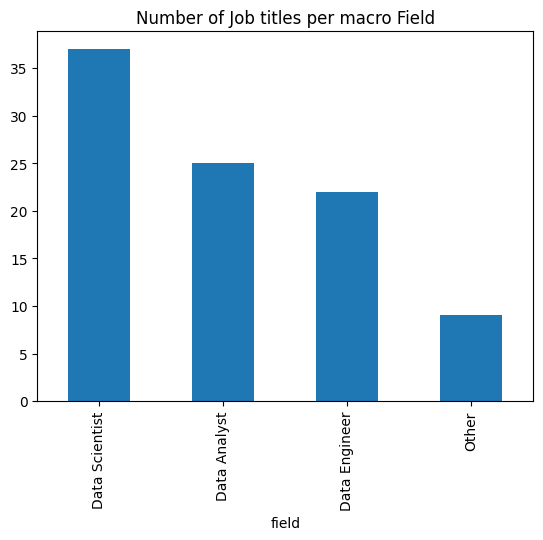

In [8]:
titles = pd.DataFrame(salaries.job_title.value_counts(normalize=True)).drop('proportion',axis=1)

Data_Science_keywords = {
    "Data Scientist"  : ['Science', 'Scientist', 'AI', 'ML', 'Machine Learning', 'Deep Learning', 'Model'],
    'Data Analyst'  : ['Analyst', 'Analysis', 'Analytic', 'Business', 'BI'],
    'Data Engineer' : ['Engineer', 'Engineering', 'Architect', 'DB', 'Database', 'Azure', 'ETL']
}

titles['field'] = 'Other'

for job_title in titles.index:
    for macro_function in Data_Science_keywords.keys():
        if any(keyword in job_title for keyword in Data_Science_keywords[macro_function]):
            titles.loc[job_title, 'field'] = macro_function
            break

titles.groupby('field').value_counts().sort_values(ascending=False).plot(kind='bar', title= 'Number of Job titles per macro Field')

print('The following titles were not categorized in the 3 big fields:')
print(titles[titles['field']=='Other'].reset_index()['job_title'])

In [9]:
salaries['field'] = salaries['job_title'].replace(titles['field'].to_dict())

In [10]:
salaries = salaries[salaries['field']!='Other']

# Jobs Growth

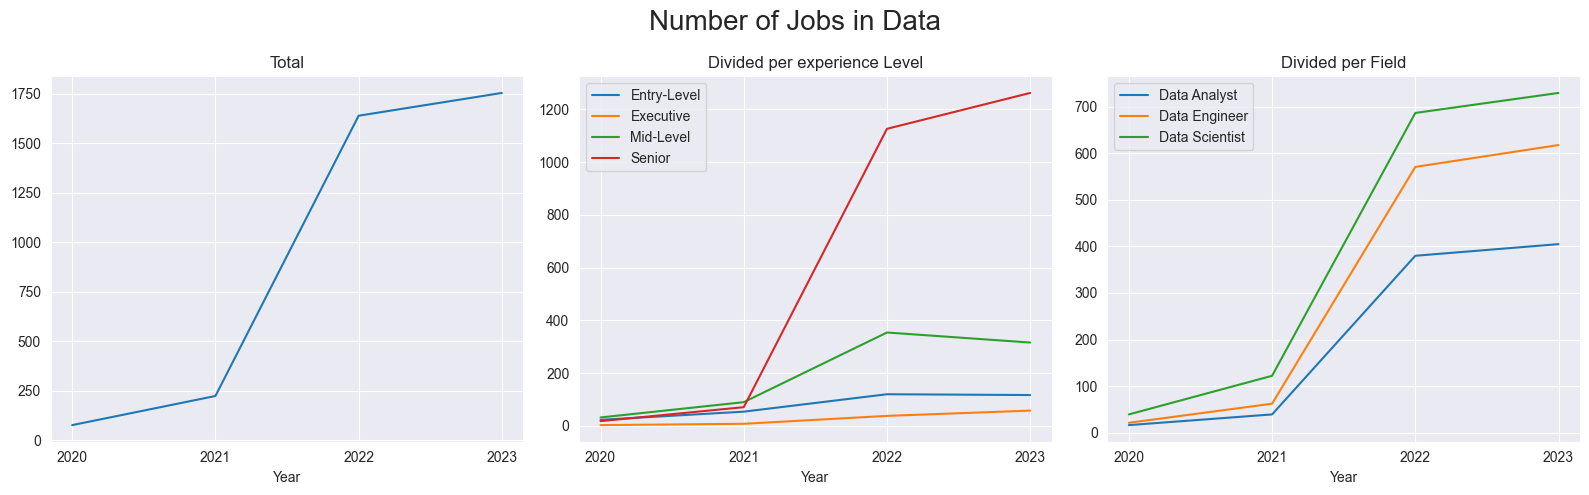

In [11]:
counts_exp = salaries.groupby(by = ['work_year', 'experience_level']).size().reset_index(name = 'counts')
counts_field = salaries.groupby(by = ['work_year', 'field']).size().reset_index(name = 'counts')

sns.set_style('darkgrid')

fig, axes = plt.subplots(1,3, figsize = (16,5))
fig.suptitle('Number of Jobs in Data', fontsize = 20)


sns.lineplot(
    ax=axes[0],
    data = counts_exp.groupby('work_year').sum(),
    x = "work_year",
    y = 'counts',
    errorbar = None
)
axes[0].set_xticks(counts_exp['work_year'].unique())
axes[0].set_xlabel('Year')
axes[0].set_ylabel('')
axes[0].set_title('Total')

sns.lineplot(
    ax=axes[1],
    data = counts_exp,
    x = "work_year",
    y = 'counts',
    hue = 'experience_level',
)
axes[1].set_xticks(counts_exp['work_year'].unique())
axes[1].set_xlabel('Year')
axes[1].set_ylabel('')
axes[1].set_title('Divided per experience Level')
axes[1].legend(title='')

sns.lineplot(
    ax=axes[2],
    data = counts_field,
    x = "work_year",
    y = 'counts',
    hue = 'field',
)
axes[2].set_xticks(counts_field['work_year'].unique())
axes[2].set_xlabel('Year')
axes[2].set_ylabel('')
axes[2].set_title('Divided per Field')
axes[2].legend(title='')


plt.tight_layout()
plt.show()

# Salary Growth

In [12]:
salaries.head(3)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_kusd,field
0,2023,Senior,FT,Principal Data Scientist,Spain,100,Spain,Large,85,Data Scientist
1,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,30,Data Scientist
2,2023,Mid-Level,CT,ML Engineer,United States,100,United States,Small,25,Data Scientist


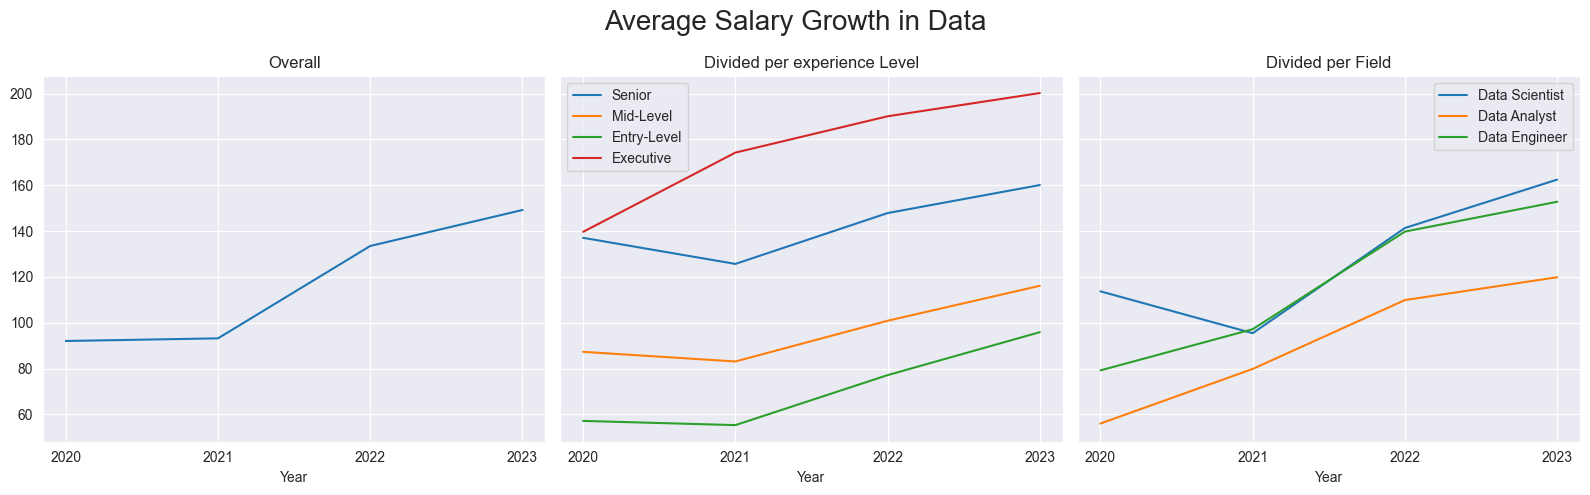

In [13]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1,3, figsize = (16,5), sharey = True)
fig.suptitle('Average Salary Growth in Data', fontsize = 20)


sns.lineplot(
    ax=axes[0],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    estimator = 'mean',
    errorbar = None
)
axes[0].set_xticks(counts_exp['work_year'].unique())
axes[0].set_xlabel('Year')
axes[0].set_ylabel('')
axes[0].set_title('Overall')

sns.lineplot(
    ax=axes[1],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    hue = 'experience_level',
    estimator = 'mean',
    errorbar = None
)
axes[1].set_xticks(counts_exp['work_year'].unique())
axes[1].set_xlabel('Year')
axes[1].set_ylabel('')
axes[1].set_title('Divided per experience Level')
axes[1].legend(title='')

sns.lineplot(
    ax=axes[2],
    data = salaries,
    x = "work_year",
    y = 'salary_in_kusd',
    hue = 'field',
    estimator = 'mean',
    errorbar = None
)
axes[2].set_xticks(counts_field['work_year'].unique())
axes[2].set_xlabel('Year')
axes[2].set_ylabel('')
axes[2].set_title('Divided per Field')
axes[2].legend(title='')


plt.tight_layout()
plt.show()

# 2023 Salary Distribution

In [22]:
exp_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']

In [26]:
df_2023 = salaries[salaries['work_year']==2023]
mean_pay = df_2023.groupby(['field', 'experience_level'])['salary_in_kusd'].mean().unstack('experience_level')
mean_pay = mean_pay[exp_order].sort_values(by ='Senior', ascending = False)

<Axes: xlabel='experience_level', ylabel='field'>

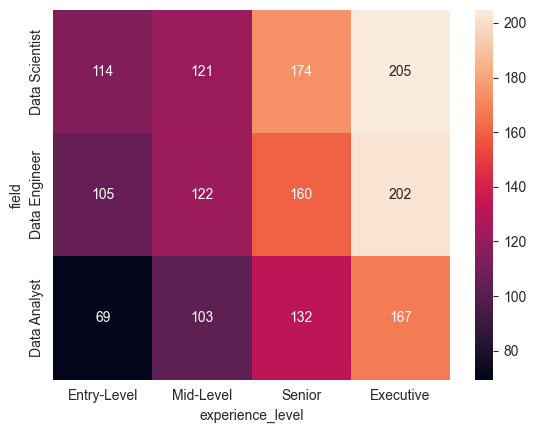

In [27]:
sns.heatmap(
    data = mean_pay,
    annot = True,
    fmt = '.0f'
)

(0.0, 400.0)

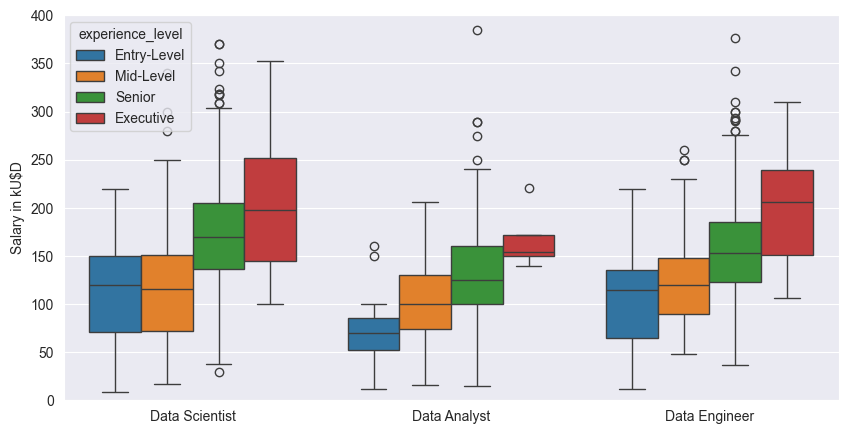

In [29]:
plt.figure(figsize = (10,5))
sns.boxplot(
    data = df_2023, 
    x = 'field',
    hue = 'experience_level',
    y = 'salary_in_kusd',
    hue_order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']
)
plt.ylabel('Salary in kU$D')
plt.xlabel('')
plt.ylim((0, 400))